## Benchmark Indexes
### Introduction
#### Index
- Thousands of indexes track the movements of various sectors, markets, and investment strategies on a daily basis, and are used to determine that market's health and performance.
- There are approximately 5000 U.S. indexes.
- Using an index, it is possible to see how much value an active manager adds and from where, or through what investments, that value comes. 

<table>
    <tr>
        <th>Index</th>
        <th>Origin</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Dow Jones Industrial Average (DJIA)</td>
        <td>U.S.</td>
        <td><b>Price-weighted average</b> of 30 publicly traded U.S. "blue chip" stocks</td>
    </tr>
     <tr>
        <td>NASDAQ Composite</td>
        <td>U.S.</td>
         <td><b>Market capitalization-weighted index</b> of approximately 3,000 common equilities listed on the NASDAQ stock exchange</td>
    </tr>
    <tr>
        <td>S&P 500</td>
        <td>U.S.</td>
        <td><b>Market capitalization-weighted index</b> that tracks the performance of 500 U.S. large-cap stocks</td>
    </tr>
    <tr>
        <td>FTSE 100</td>
        <td>UK</td>
        <td><b>Market-capitalization-weighted index</b> of the 100 largest UK companies traded on the London Stock Exchange</td>
    </tr>
    <tr>
        <td>MSCI World Index</td>
        <td>Global Equilites</td>
        <td><b>Free float-adjusted market capitalization index</b>, consisting of 23 developed market country indexes</td>
    </tr>
     <tr>
        <td>Russell 2000</td>
        <td>U.S.</td>
        <td></td>
</table>

**Market capitalization**: the total amount of money company is valued in the stock market. It is calculated by the number of shares a company has times the price the stocks are selling at. 

#### Russell 2000 Index
- Russell 2000 index measures the performance of the 2000 smaller companies that are included in the Rusell 3000 index, which itself is made up of nearly all U.S. stocks. 
- It is made up of the bottom two-thirds in company size of the Russell 3000 index.
- It is widely regarded as a bellwether of the U.S. economy.

#### DJIA
- A stock market index that tracks 30 large, publicly-onwed blue-chip companies trading on the NYSE and the NASDAQ. 

#### Reference
- [Benchmarks](https://www.pimco.com/en-us/resources/education/understanding-benchmarks/)
- <a href="https://finance.yahoo.com/world-indices/">Major World Indices</a>
- [Market Cap and Why Is it Important](https://www.thebalance.com/market-capitalization-3305826)
- [Russell 2000 Index](https://www.investopedia.com/terms/r/russell2000.asp)
- [Dow Jones Industrial Average (DJIA)](https://www.investopedia.com/terms/d/djia.asp)
- [An Introduction to U.S. Stock Market Indexes](https://www.investopedia.com/insights/introduction-to-stock-market-indices/)

## Questions Tried to Answer: 
### Is Nasdaq a bubble right now?
### How similar is today's market to dot.com bubble?

In [48]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Library
from datetime import date

# Scaling library
import sklearn.preprocessing

# Helper Functions
import acquire

# Environment File
import env

# Create A Progressive Bar for Loop Operation 
from tqdm.notebook import tqdm

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Load database path
database = env.benchmarksdb

# Set plotting default paras
plt.style.use('seaborn-talk')

## Acquire Historical Data of Major Indexes

In [3]:
%%time
# Create a list of benchmark index symbols
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^NDX', '^TNX', '^TYX']

# Define the start and end date
start_date = "1995-01-01"
end_date = date.today()

# Acquire their adjusted closing price
df_marks = acquire.acquire_stock_adjclosing(symbols, start_date, end_date)

# Print the number of records
print(df_marks.shape[0], '\n')

# Create a list of benchmark index names
benchmarks = ['SP500', 'Dow30', 'Nas', 'R2000', 'Nas100', 'Tr10', 'Tr30']

# Rename the columns as bechmark index names
df_marks.columns = benchmarks

# Inspect the tail of the dataframe
df_marks.tail()

6646 

CPU times: user 871 ms, sys: 149 ms, total: 1.02 s
Wall time: 5.58 s


,SP500,Dow30,Nas,R2000,Nas100,Tr10,Tr30
Date,,,,,,,
2021-05-19,4115.680176,33896.039062,13299.740234,2193.639893,13237.910156,1.683,2.387
2021-05-20,4159.120117,34084.148438,13535.740234,2207.760010,13494.089844,1.634,2.342
2021-05-21,4155.859863,34207.839844,13470.990234,2215.270020,13411.740234,1.632,2.333
2021-05-24,4197.049805,34393.980469,13661.169922,2227.340088,13641.750000,1.608,2.302
2021-05-25,4188.129883,34312.460938,13657.173828,2205.750488,13657.729492,1.564,2.260


In [4]:
# Print the concise summary
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6646 entries, 1995-01-03 to 2021-05-25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   6646 non-null   float64
 1   Dow30   6646 non-null   float64
 2   Nas     6646 non-null   float64
 3   R2000   6646 non-null   float64
 4   Nas100  6646 non-null   float64
 5   Tr10    6595 non-null   float64
 6   Tr30    6595 non-null   float64
dtypes: float64(7)
memory usage: 415.4 KB


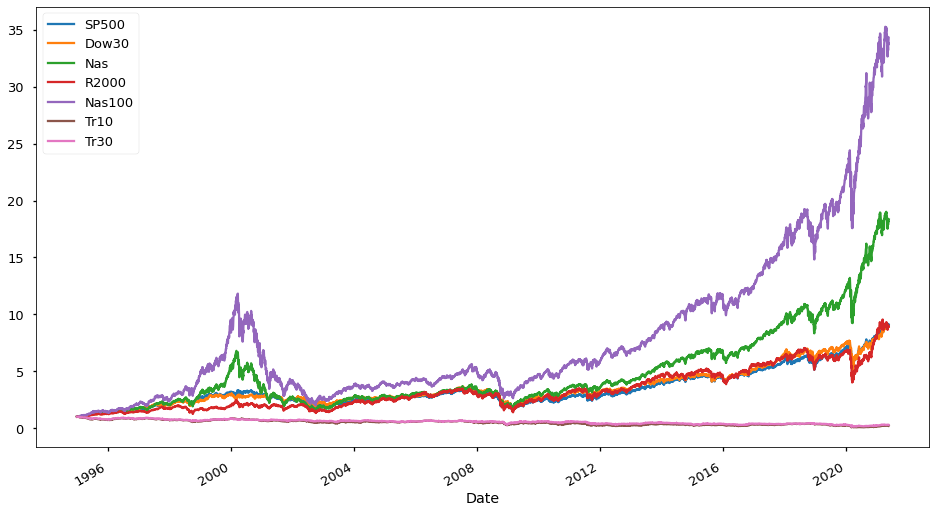

In [5]:
# Plot the growth of the major indexes since 1995

df_marks_1995 = df_marks.apply(lambda i: i/i.iloc[0], axis=0)
df_marks_1995.plot(figsize=(16,9))

plt.show()

In [6]:
# Inspect the dataframe
df_marks_1995.tail()

,SP500,Dow30,Nas,R2000,Nas100,Tr10,Tr30
Date,,,,,,,
2021-05-19,8.964475,8.830589,17.886092,8.872512,33.261081,0.213660,0.301770
2021-05-20,9.059093,8.879595,18.203475,8.929623,33.904748,0.207439,0.296081
2021-05-21,9.051992,8.911819,18.116396,8.959998,33.697840,0.207185,0.294943
2021-05-24,9.141709,8.960313,18.372158,9.008817,34.275754,0.204139,0.291024
2021-05-25,9.122280,8.939075,18.366784,8.921495,34.315903,0.198553,0.285714


In [5]:
# Save as csv
df_marks_1995.to_csv(f"{database}majorindexes95.csv")

## Federal Funds Rate
### - When is Fed going to raise interest rates?
### - How fed funds rate affect the major indices?
### - What factors that drive the rate? 

In [14]:
# Load Federal Funds Rate Data and print a concise summary

ffunds = pd.read_csv(f"{database}ffunds.csv")
ffunds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      802 non-null    object 
 1   FEDFUNDS  802 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.7+ KB


In [13]:
# Inspect the funds rate data
ffunds

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
797,2020-12-01,0.09
798,2021-01-01,0.09
799,2021-02-01,0.08
800,2021-03-01,0.07


**Takeaways**
- The funds rate has been recored since July 1954 and updates every month.

In [15]:
# Rename the column names
ffunds.columns = ['Date', 'Rate']

# Convert the data column to datetime format
ffunds.Date = pd.to_datetime(ffunds.Date)

# Set the date column as the index
ffunds = ffunds.set_index("Date")

# Inspect the dataframe
ffunds.head()

,Rate
Date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


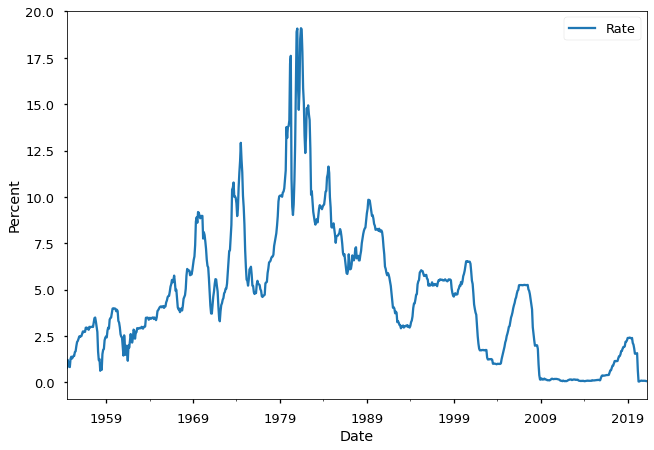

In [21]:
# Plot how rate change over time

ffunds.plot()
plt.ylabel("Percent")
plt.show()

In [38]:
# Acquire S&P 500 index in the same date range and print the summary

sp500 = acquire.acquire_stock_adjclosing('^GSPC', '1954-07-01', '2021-04-30')
sp500 = pd.DataFrame(sp500) # Convert Series to DataFrame
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16824 entries, 1954-07-01 to 2021-04-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  16824 non-null  float64
dtypes: float64(1)
memory usage: 262.9 KB


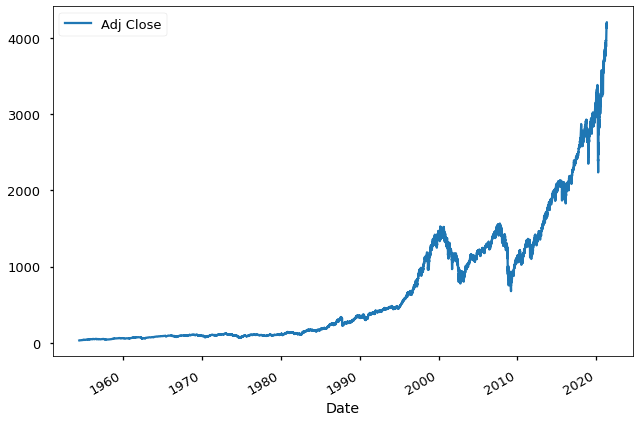

In [39]:
# Plot the S&P500 index over time

sp500.plot()
plt.show()

In [40]:
# Resample the S&P500 by month and compute the monthly mean

sp500 = sp500.resample('M')['Adj Close'].mean()
sp500

Date
1954-07-31      30.126667
1954-08-31      30.729545
1954-09-30      31.454762
1954-10-31      32.176666
1954-11-30      33.442000
                 ...     
2020-12-31    3695.310014
2021-01-31    3793.748432
2021-02-28    3883.432116
2021-03-31    3910.508280
2021-04-30    4141.176200
Freq: M, Name: Adj Close, Length: 802, dtype: float64

In [44]:
# Concat the Federal Funding Rate

ffunds['sp500'] = sp500.values
ffunds

,Rate,sp500
Date,,
1954-07-01,0.80,30.126667
1954-08-01,1.22,30.729545
1954-09-01,1.07,31.454762
1954-10-01,0.85,32.176666
1954-11-01,0.83,33.442000
...,...,...
2020-12-01,0.09,3695.310014
2021-01-01,0.09,3793.748432
2021-02-01,0.08,3883.432116


In [97]:
# Make a copy

df = ffunds.copy()
df.tail(60)

,Rate,sp500
Date,,
2016-05-01,0.37,2065.550479
2016-06-01,0.38,2083.891369
2016-07-01,0.39,2148.901978
2016-08-01,0.40,2177.482167
2016-09-01,0.40,2157.690964
2016-10-01,0.40,2143.020938
2016-11-01,0.41,2164.985689
2016-12-01,0.54,2246.629046
2017-01-01,0.65,2275.115979


In [71]:
# Scale the dataset for the purpose of comparision

scaler = sklearn.preprocessing.MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df))

df_scaled.index = df.index
df_scaled.columns = df.columns

df_scaled

,Rate,sp500
Date,,
1954-07-01,0.039370,0.000000
1954-08-01,0.061417,0.000147
1954-09-01,0.053543,0.000323
1954-10-01,0.041995,0.000499
1954-11-01,0.040945,0.000806
...,...,...
2020-12-01,0.002100,0.891544
2021-01-01,0.002100,0.915489
2021-02-01,0.001575,0.937305


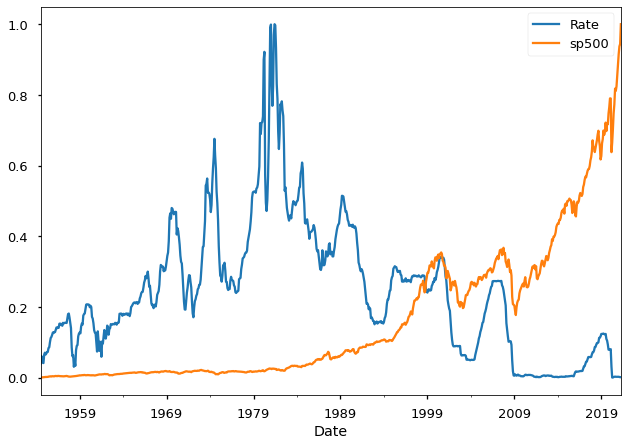

In [76]:
# Plot the scaled Federal Fund Rate and S&P500 index since July 1954

df_scaled.plot()
plt.show()

In [96]:
df_diff = ffunds.diff(1).loc['1990':]
df_diff.tail(60)

,Rate,sp500
Date,,
2016-05-01,0.00,-9.984753
2016-06-01,0.01,18.340890
2016-07-01,0.01,65.010609
2016-08-01,0.01,28.580190
2016-09-01,0.00,-19.791203
2016-10-01,0.00,-14.670027
2016-11-01,0.01,21.964751
2016-12-01,0.13,81.643357
2017-01-01,0.11,28.486933


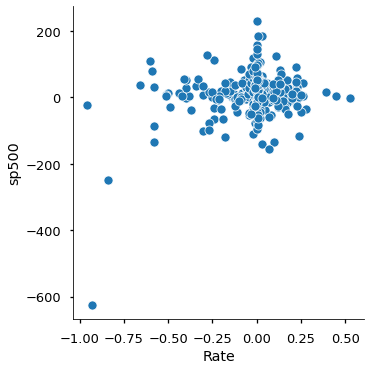

In [91]:
sns.relplot(data=df_diff, x='Rate', y='sp500')
plt.show()

### Dot.com Bubble Growth Rate and Deflation Rate

In [6]:
# Read the scaled data
df = pd.read_csv(f"{database}majorindexes95.csv")

# Convert the date column from string to datetime format
df.Date = pd.to_datetime(df.Date)

# Set the date column as the index and sort its values
df = df.set_index("Date").sort_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6644 entries, 1995-01-03 to 2021-05-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      6644 non-null   float64
 1   dow     6644 non-null   float64
 2   nas     6644 non-null   float64
 3   r2000   6644 non-null   float64
 4   nas100  6644 non-null   float64
dtypes: float64(5)
memory usage: 311.4 KB


In [7]:
# Inspect the dataframe
df.head()

,sp,dow,nas,r2000,nas100
Date,,,,,
1995-01-03,1.000000,1.000000,1.000000,1.000000,1.000000
1995-01-04,1.003485,1.004994,1.003039,1.001658,1.004146
1995-01-05,1.002679,1.003241,1.002797,1.000890,1.000050
1995-01-06,1.003420,1.007537,1.008217,1.003397,1.009020
1995-01-09,1.003746,1.005958,1.011445,1.004570,1.013894


In [137]:
# Compute the daily difference

df_diff = df.diff(1)
df_diff.head()

,sp,dow,nas,r2000,nas100
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,0.003485,0.004994,0.003039,0.001658,0.004146
1995-01-05,-0.000806,-0.001753,-0.000242,-0.000768,-0.004095
1995-01-06,0.000741,0.004296,0.005420,0.002508,0.008970
1995-01-09,0.000327,-0.001579,0.003228,0.001173,0.004874


In [138]:
# Shift the difference

df_diff = df_diff.shift(-1)
df_diff.head()

,sp,dow,nas,r2000,nas100
Date,,,,,
1995-01-03,0.003485,0.004994,0.003039,0.001658,0.004146
1995-01-04,-0.000806,-0.001753,-0.000242,-0.000768,-0.004095
1995-01-05,0.000741,0.004296,0.005420,0.002508,0.008970
1995-01-06,0.000327,-0.001579,0.003228,0.001173,0.004874
1995-01-09,0.001851,0.001404,0.005958,0.002467,0.010151


In [139]:
# Fill the NaN with 0

df_diff = df_diff.fillna(0)
df_diff.head()

,sp,dow,nas,r2000,nas100
Date,,,,,
1995-01-03,0.003485,0.004994,0.003039,0.001658,0.004146
1995-01-04,-0.000806,-0.001753,-0.000242,-0.000768,-0.004095
1995-01-05,0.000741,0.004296,0.005420,0.002508,0.008970
1995-01-06,0.000327,-0.001579,0.003228,0.001173,0.004874
1995-01-09,0.001851,0.001404,0.005958,0.002467,0.010151


In [140]:
# Modify the column names

df_diff.columns = ['sp_diff', 'dow_diff', 'nas_diff', 'r2000_diff', 'nas100_diff']
df_diff.head()

,sp_diff,dow_diff,nas_diff,r2000_diff,nas100_diff
Date,,,,,
1995-01-03,0.003485,0.004994,0.003039,0.001658,0.004146
1995-01-04,-0.000806,-0.001753,-0.000242,-0.000768,-0.004095
1995-01-05,0.000741,0.004296,0.005420,0.002508,0.008970
1995-01-06,0.000327,-0.001579,0.003228,0.001173,0.004874
1995-01-09,0.001851,0.001404,0.005958,0.002467,0.010151


In [141]:
# Join the two dataframes

df = pd.concat([df, df_diff], axis=1)
df.head()

,sp,dow,nas,r2000,nas100,sp_diff,dow_diff,nas_diff,r2000_diff,nas100_diff
Date,,,,,,,,,,
1995-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,0.003485,0.004994,0.003039,0.001658,0.004146
1995-01-04,1.003485,1.004994,1.003039,1.001658,1.004146,-0.000806,-0.001753,-0.000242,-0.000768,-0.004095
1995-01-05,1.002679,1.003241,1.002797,1.000890,1.000050,0.000741,0.004296,0.005420,0.002508,0.008970
1995-01-06,1.003420,1.007537,1.008217,1.003397,1.009020,0.000327,-0.001579,0.003228,0.001173,0.004874
1995-01-09,1.003746,1.005958,1.011445,1.004570,1.013894,0.001851,0.001404,0.005958,0.002467,0.010151


In [142]:
df_acc = df[['sp_diff', 'nas_diff']]
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6638 entries, 1995-01-03 to 2021-05-13
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sp_diff   6638 non-null   float64
 1   nas_diff  6638 non-null   float64
dtypes: float64(2)
memory usage: 155.6 KB


In [145]:
df_acc

,sp_diff,nas_diff
Date,,
1995-01-03,0.003485,0.003039
1995-01-04,-0.000806,-0.000242
1995-01-05,0.000741,0.005420
1995-01-06,0.000327,0.003228
1995-01-09,0.001851,0.005958
...,...,...
2021-05-07,-0.096208,-0.471207
2021-05-10,-0.079132,-0.016717
2021-05-11,-0.193984,-0.481118


In [150]:
df_acc.diff(1).shift(-1).fillna(0).to_csv(f"{database}acceleration.csv")

In [119]:
# Select insterested columns

df_pdc = df[['sp', 'sp_diff', 'nas', 'nas_diff']]
df_pdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6638 entries, 1995-01-03 to 2021-05-13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sp        6638 non-null   float64
 1   sp_diff   6638 non-null   float64
 2   nas       6638 non-null   float64
 3   nas_diff  6638 non-null   float64
dtypes: float64(4)
memory usage: 259.3 KB


In [120]:
# Compuete the percentage of daily change (pdc)

df_pdc = df_pdc.assign(sp_pdc = df_pdc['sp_diff']/df_pdc['sp'], 
                       nas_pdc = df_pdc['nas_diff']/df_pdc['nas'])
df_pdc

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc
Date,,,,,,
1995-01-03,1.000000,0.003485,1.000000,0.003039,0.003485,0.003039
1995-01-04,1.003485,-0.000806,1.003039,-0.000242,-0.000803,-0.000241
1995-01-05,1.002679,0.000741,1.002797,0.005420,0.000739,0.005405
1995-01-06,1.003420,0.000327,1.008217,0.003228,0.000326,0.003201
1995-01-09,1.003746,0.001851,1.011445,0.005958,0.001845,0.005890
...,...,...,...,...,...,...
2021-05-07,9.219142,-0.096208,18.494634,-0.471207,-0.010436,-0.025478
2021-05-10,9.122934,-0.079132,18.023427,-0.016717,-0.008674,-0.000928
2021-05-11,9.043803,-0.193984,18.006710,-0.481118,-0.021449,-0.026719


In [121]:
# Add new columns to indicate the sign of the percentage of daily change

df_pdc = df_pdc.assign(sp_sign = [1 if i > 0 else 0 for i in df_pdc['sp_pdc']], 
                       nas_sign = [1 if i > 0 else 0 for i in df_pdc['nas_pdc']])
df_pdc

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign
Date,,,,,,,,
1995-01-03,1.000000,0.003485,1.000000,0.003039,0.003485,0.003039,1,1
1995-01-04,1.003485,-0.000806,1.003039,-0.000242,-0.000803,-0.000241,0,0
1995-01-05,1.002679,0.000741,1.002797,0.005420,0.000739,0.005405,1,1
1995-01-06,1.003420,0.000327,1.008217,0.003228,0.000326,0.003201,1,1
1995-01-09,1.003746,0.001851,1.011445,0.005958,0.001845,0.005890,1,1
...,...,...,...,...,...,...,...,...
2021-05-07,9.219142,-0.096208,18.494634,-0.471207,-0.010436,-0.025478,0,0
2021-05-10,9.122934,-0.079132,18.023427,-0.016717,-0.008674,-0.000928,0,0
2021-05-11,9.043803,-0.193984,18.006710,-0.481118,-0.021449,-0.026719,0,0


In [122]:
# Sanity check
df_pdc.sample(10)

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign
Date,,,,,,,,
2018-09-24,6.358760,-0.008299,10.749684,0.019124,-0.001305,0.001779,0,1
2012-02-17,2.964932,0.002135,3.969687,-0.004317,0.000720,-0.001087,1,0
2020-01-27,7.065039,0.071029,12.290956,0.175328,0.010054,0.014265,1,1
1997-09-19,2.070332,0.010716,2.259824,0.012225,0.005176,0.005410,1,1
2017-01-25,5.006143,-0.003681,7.606901,-0.001560,-0.000735,-0.000205,0,0
2020-03-24,5.330596,0.061488,9.975873,-0.045133,0.011535,-0.004524,1,0
1996-10-18,1.548256,-0.002113,1.670943,-0.008163,-0.001365,-0.004885,0,0
2019-10-09,6.358825,0.040796,10.629307,0.063261,0.006416,0.005952,1,1
2007-10-02,3.368757,-0.015334,3.694438,-0.023777,-0.004552,-0.006436,0,0


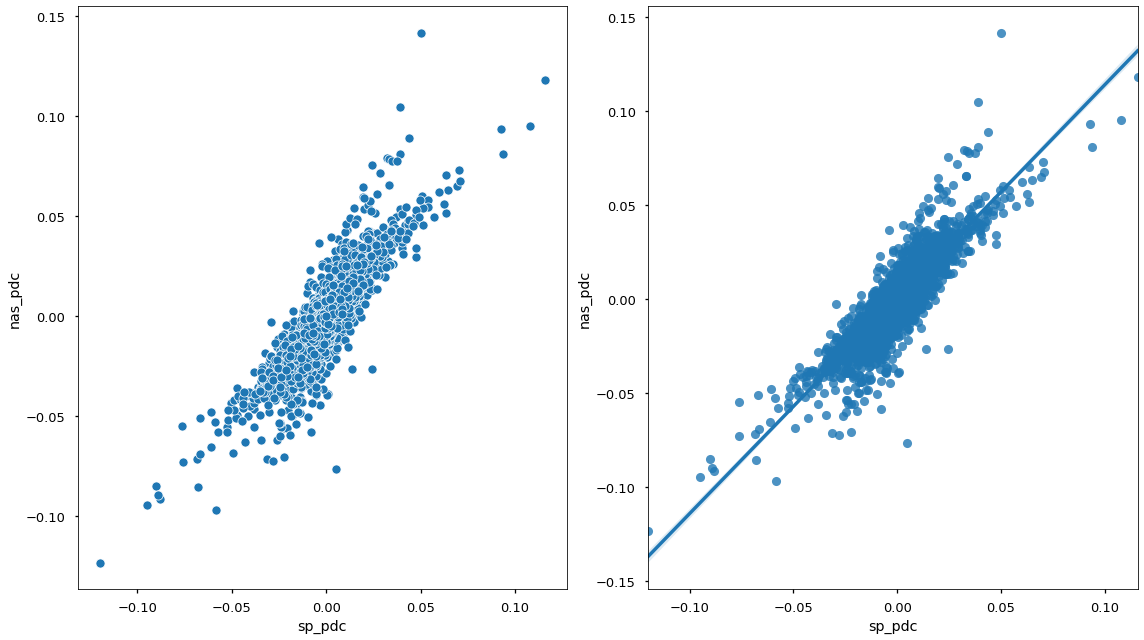

In [123]:
# Visualize the relationship of the pdc of sp and nas

plt.figure(figsize=(16,9))

plt.subplot(121)
sns.scatterplot(data=df_pdc, x='sp_pdc', y='nas_pdc')

plt.subplot(122)
sns.regplot(data=df_pdc, x='sp_pdc', y='nas_pdc')

plt.tight_layout()
plt.show()

In [124]:
# Save as csv
# df_pdc.to_csv(f"{database}spnaspdc95.csv")

In [126]:
# Add a new column

df_pdc = df_pdc.assign(diff = df_pdc['nas_pdc'] - df_pdc['sp_pdc'])
df_pdc.head()

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign,diff
Date,,,,,,,,,
1995-01-03,1.000000,0.003485,1.000000,0.003039,0.003485,0.003039,1,1,-0.000446
1995-01-04,1.003485,-0.000806,1.003039,-0.000242,-0.000803,-0.000241,0,0,0.000562
1995-01-05,1.002679,0.000741,1.002797,0.005420,0.000739,0.005405,1,1,0.004666
1995-01-06,1.003420,0.000327,1.008217,0.003228,0.000326,0.003201,1,1,0.002876
1995-01-09,1.003746,0.001851,1.011445,0.005958,0.001845,0.005890,1,1,0.004046


In [127]:
# Add a new column

df_pdc = df_pdc.assign(diff_sign = [1 if i > 0 else 0 for i in df_pdc['diff']])
df_pdc.head()

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign,diff,diff_sign
Date,,,,,,,,,,
1995-01-03,1.000000,0.003485,1.000000,0.003039,0.003485,0.003039,1,1,-0.000446,0
1995-01-04,1.003485,-0.000806,1.003039,-0.000242,-0.000803,-0.000241,0,0,0.000562,1
1995-01-05,1.002679,0.000741,1.002797,0.005420,0.000739,0.005405,1,1,0.004666,1
1995-01-06,1.003420,0.000327,1.008217,0.003228,0.000326,0.003201,1,1,0.002876,1
1995-01-09,1.003746,0.001851,1.011445,0.005958,0.001845,0.005890,1,1,0.004046,1


In [130]:
pd.concat([df_marks, df_pdc], axis=1).to_csv(f"{database}majorindexes.csv")

In [93]:
df_growth = df_pdc.loc['1998-10-5': '2000-03-06']
df_growth.head()

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign,diff,diff_sign
Date,,,,,,,,,,
1998-10-05,2.153210,-0.008647,2.066610,-0.034697,-0.004016,-0.016789,0,0,-0.012773,0
1998-10-06,2.144562,-0.030298,2.031913,-0.064929,-0.014128,-0.031955,0,0,-0.017827,0
1998-10-07,2.114265,-0.024482,1.966984,-0.058487,-0.011580,-0.029735,0,0,-0.018155,0
1998-10-08,2.089782,0.054344,1.908497,0.098671,0.026005,0.051701,1,1,0.025696,1
1998-10-09,2.144127,0.029013,2.007168,0.072070,0.013531,0.035906,1,1,0.022375,1


In [94]:
df_growth.shape

(358, 10)

In [98]:
df_growth.diff_sign.value_counts()

1    222
0    136
Name: diff_sign, dtype: int64

In [97]:
df_growth.groupby('diff_sign')['diff'].mean()

diff_sign
0   -0.008073
1    0.008857
Name: diff, dtype: float64

In [99]:
df_growth.groupby('diff_sign')['diff'].sum()

diff_sign
0   -1.097866
1    1.966364
Name: diff, dtype: float64

In [100]:
df_growth_now = df_pdc.loc['2020-3-01': '2021-4-12']
df_growth_now.head()

,sp,sp_diff,nas,nas_diff,sp_pdc,nas_pdc,sp_sign,nas_sign,diff,diff_sign
Date,,,,,,,,,,
2020-03-02,6.730914,-0.189192,12.039283,-0.360526,-0.028108,-0.029946,0,0,-0.001838,0
2020-03-03,6.541722,0.276078,11.678756,0.449178,0.042203,0.038461,1,1,-0.003741,0
2020-03-04,6.817800,-0.231274,12.127935,-0.375884,-0.033922,-0.030993,0,0,0.002929,1
2020-03-05,6.586526,-0.112326,11.752050,-0.219169,-0.017054,-0.018649,0,0,-0.001596,0
2020-03-06,6.474201,-0.491843,11.532881,-0.840447,-0.075970,-0.072874,0,0,0.003096,1


In [ ]:
df_growth_now.diff_sign.value_counts()

In [101]:
df_growth_now.diff_sign.value_counts()

1    154
0    127
Name: diff_sign, dtype: int64

In [102]:
df_growth_now.groupby('diff_sign')['diff'].mean()

diff_sign
0   -0.005227
1    0.005360
Name: diff, dtype: float64

In [103]:
df_growth_now.groupby('diff_sign')['diff'].sum()

diff_sign
0   -0.663777
1    0.825443
Name: diff, dtype: float64